Домашнее задание 2: Построение простого классификатора изображений

Цель: Изучить применение методов машинного обучения для классификации изображений, сравнить эффективность классических алгоритмов и нейронных сетей.
Задание:
1. Подготовка данных:
    * Выберите набор данных:
        * MNIST для классификации рукописных цифр.
        * Или CIFAR-10 для классификации объектов в цветных изображениях.
    * Разделите данные на обучающую (80%) и тестовую (20%) выборки.
2. Классификация с использованием kNN или SVM:
    * Реализуйте классификатор k-ближайших соседей (kNN) или метод опорных векторов (SVM).
    * Обучите модель на обучающей выборке.
    * Предскажите классы на тестовой выборке.
    * Вычислите метрики качества: точность, полнота, F1-score.
    * Постройте матрицу ошибок (confusion matrix).
3. Построение и обучение нейронной сети:
    * Создайте многослойный перцептрон (MLP) с использованием Keras или PyTorch.
    * Определите архитектуру сети (количество слоев, нейронов, функции активации).
    * Обучите модель на тех же данных.
    * Проанализируйте динамику обучения (графики потерь и точности).
4. Сравнительный анализ моделей:
    * Сравните результаты классического алгоритма (kNN/SVM) и нейронной сети.
    * Обсудите преимущества и недостатки каждого подхода.
    * Предложите способы улучшения моделей.

Дополнительные указания:

* При выполнении заданий рекомендуется использовать Jupyter Notebook для удобства сочетания кода и пояснений.

* Поощряется самостоятельное исследование и применение дополнительных методов (например, нормализация данных, использование других метрик).

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float32') / 255.0
y = mnist.target.astype(int)

In [ ]:
### Разделение данных на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
### Нормализация данных

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy of kNN: 0.9458
Recall of kNN: 0.9451
F1 Score of kNN: 0.9454


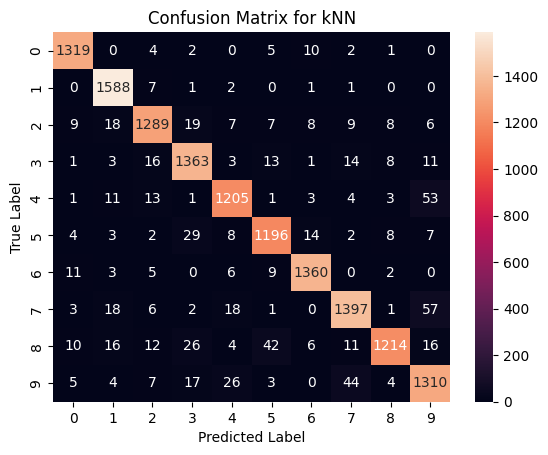

In [ ]:
### Обучение модели kNN

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Считаем метрики
acc_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print("Accuracy of kNN: %.4f" % acc_knn)
print("Recall of kNN: %.4f" % recall_knn)
print("F1 Score of kNN: %.4f" % f1_knn)

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for kNN')
plt.show()

Accuracy of SVM: 0.9211
Recall of SVM: 0.9200
F1 Score of SVM: 0.9199


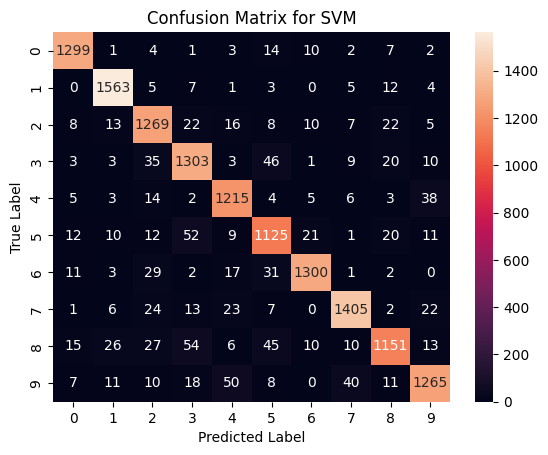

In [ ]:
### Обучение модели SVM

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Считаем метрики
acc_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print("Accuracy of SVM: %.4f" % acc_svm)
print("Recall of SVM: %.4f" % recall_svm)
print("F1 Score of SVM: %.4f" % f1_svm)

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

In [ ]:
### Многослойный перцептрон (MLP) с использованием Keras

model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)), # входное изображение 28*28=784
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax') # 10 классов для цифр от 0 до 9
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=128)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8599 - loss: 0.4663 - val_accuracy: 0.9553 - val_loss: 0.1674
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9609 - loss: 0.1304 - val_accuracy: 0.9641 - val_loss: 0.1349
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9721 - loss: 0.0880 - val_accuracy: 0.9684 - val_loss: 0.1204
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9782 - loss: 0.0694 - val_accuracy: 0.9687 - val_loss: 0.1134
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9795 - loss: 0.0696 - val_accuracy: 0.9699 - val_loss: 0.1281
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9825 - loss: 0.0547 - val_accuracy: 0.9746 - val_loss: 0.1191
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9861 - loss: 0.0454 - val_accuracy: 0.9721 - val_loss: 0.1437
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9877 - loss: 0.0427 - val_a

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy of MLP: 0.9742
Recall of MLP: 0.9740
F1 Score of MLP: 0.9740


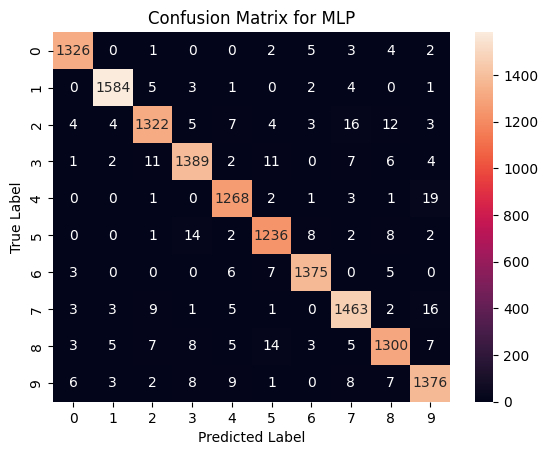

In [ ]:
# Предсказание классов
y_pred_mlp_probas = model.predict(X_test_scaled)  # Получение вероятностей классов
y_pred_mlp = np.argmax(y_pred_mlp_probas, axis=-1)  # Преобразование вероятностей в классы

# Считаем метрики
acc_mlp = accuracy_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp, average='macro')
f1_mlp = f1_score(y_test, y_pred_mlp, average='macro')

# Оценка модели на тех же метриках
print("Accuracy of MLP: %.4f" % acc_mlp)
print("Recall of MLP: %.4f" % recall_mlp)
print("F1 Score of MLP: %.4f" % f1_mlp)

cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MLP')
plt.show()

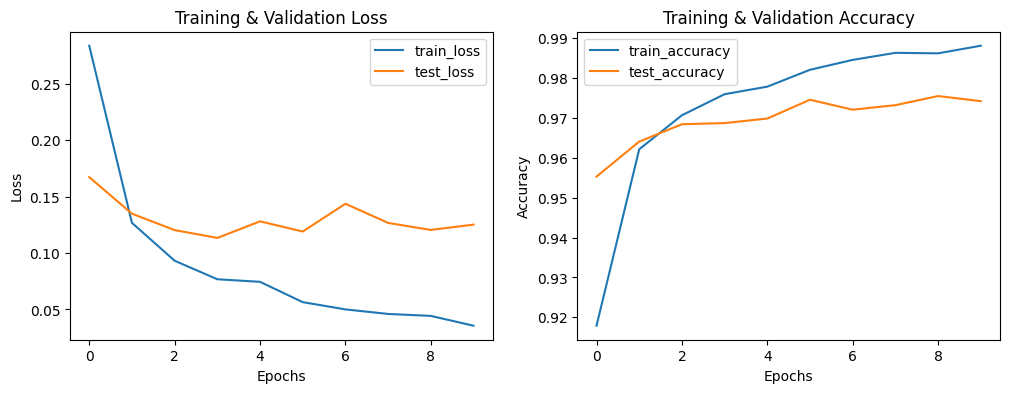

In [ ]:
# График потерь и точности

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.subplot(122)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.show()

# Сравнение моделей

In [ ]:
# По метрикам
print(f"Accuracy:\n\tKNN: {acc_knn:.4f}\n\tSVM: {acc_svm:.4f}\n\tMLP: {acc_mlp:.4f}")
print(f"Recall:\n\tKNN: {recall_knn:.4f}\n\tSVM: {recall_svm:.4f}\n\tMLP: {recall_mlp:.4f}")
print(f"F1-score:\n\tKNN: {f1_knn:.4f}\n\tSVM: {f1_svm:.4f}\n\tMLP: {f1_mlp:.4f}")

Accuracy:
	KNN: 0.9458
	SVM: 0.9211
	MLP: 0.9742
Recall:
	KNN: 0.9451
	SVM: 0.9200
	MLP: 0.9740
F1-score:
	KNN: 0.9454
	SVM: 0.9199
	MLP: 0.9740


Видим, что по метрикам лучше всего показала себя нейронка

## Обсуждение преимуществ и недостатков


### kNN (K Ближайших Соседей)
- Преимущества:
  - Простая реализация и интерпретация.
  - Хорошо работает на небольших наборах данных.
  
- Недостатки:
  - Медленно на больших наборах данных, так как нужно сравнивать каждый новый образец со всеми обучающими примерами.
  - Чувствителен к выбросам и шуму в данных.

### SVM (Support Vector Machine)
- Преимущества:
  - Высокая обобщающая способность благодаря максимизации маржинальной границы.
  - Может справляться с линейно неразделимыми классами с использованием ядер.
  
- Недостатки:
  - Трудоемкий процесс обучения на больших объемах данных.
  - Ограниченная интерпретируемость решений.

### Нейронная сеть (MLP)

- Преимущества:
  - Высокие показатели точности на сложных задачах, особенно в случае изображений.
  - Способность автоматически извлекать полезные признаки из данных.
  - Масштабируется на большие объемы данных.
  
- Недостатки:
  - Требуется много данных для обучения.
  - Процесс обучения занимает больше времени и ресурсов.
  - Особо нет интерпретируемости по сравнению с классическими моделями.

# Способы улучшения моделей

## **Улучшение kNN**

- **Выбор оптимального k**: Параметр $k$ определяет число ближайших соседей, используемых для принятия решения. Вы можете попробовать различные значения $k$, начиная с небольшого числа (например, 3 или 5), и выбрать то значение, которое обеспечивает наилучшую точность на проверочном наборе.
  

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of k: {best_k}")

Best value of k: 3


- **Использование взвешенных расстояний**: В стандартной реализации kNN расстояния считаются одинаково важными. Однако можно присвоить веса соседям в зависимости от их близости к рассматриваемому объекту. Это поможет уменьшить влияние дальних соседей.

In [ ]:
knn_weighted = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_weighted.fit(X_train_scaled, y_train)
y_pred_best_knn = knn_weighted.predict(X_test_scaled)

## **Улучшение SVM**

- **Оптимизация гиперпараметров**: Основные параметры SVM — это C (регуляризационный параметр) и гамма ($\gamma$) ядра. Их настройка критична для производительности модели.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3],  # для poly kernels
    'gamma': ['scale', 'auto'],  # для rbf kernels
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

In [ ]:
best_svm = SVC(**best_params)
best_svm.fit(X_train_scaled, y_train)
y_pred_best_svm = best_svm.predict(X_test_scaled)

#### 1. **Улучшение MLP**

 **Можно пробовать разные архитектурные изменения**:

- Количество слоев и нейронов.
- Тип активационных функций.
- batch size.
- learning rate.
- Оптимизатор.

---

#### 2. **Early Stopping**

Переобучение — одна из основных проблем глубоких нейронных сетей. Ранняя остановка помогает остановить обучение, когда модель перестает улучшаться на валидационной выборке. Это предотвращает переобучение и экономит вычислительные ресурсы.

---

#### 3. **Data Augmentation**

Поскольку MLP обучается на изображениях, увеличение разнообразия данных может значительно улучшить производительность. Для этого можно использовать методы увеличения данных, такие как поворот, отражение, изменение яркости и контрастности изображений.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
datagen.fit(X_train_scaled)

model.fit(datagen.flow(X_train_scaled, y_train, batch_size=32),
          validation_data=(X_test_scaled, y_test),
          epochs=50,
          steps_per_epoch=X_train_scaled.shape[0]//32,
          callbacks=[early_stopping])

y_pred_best_mlp_probas = model.predict(X_test_scaled)
y_pred_best_mlp = np.argmax(y_pred_best_mlp_probas, axis=-1)

# Новое сравнение

In [ ]:
acc_best_knn = accuracy_score(y_test, y_pred_best_knn)
recall_best_knn = recall_score(y_test, y_pred_best_knn, average='macro')
f1_best_knn = f1_score(y_test, y_pred_best_knn, average='macro')

acc_best_svm = accuracy_score(y_test, y_pred_best_svm)
recall_best_svm = recall_score(y_test, y_pred_best_svm, average='macro')
f1_best_svm = f1_score(y_test, y_pred_best_svm, average='macro')

acc_best_mlp = accuracy_score(y_test, y_pred_best_mlp)
recall_best_mlp = recall_score(y_test, y_pred_best_mlp, average='macro')
f1_best_mlp = f1_score(y_test, y_pred_best_mlp, average='macro')

print(f"Accuracy:\n\tKNN: {acc_knn:.4f}\n\t Best_KNN{acc_best_knn:.4f}\n\t SVM: {acc_svm:.4f}\n\t Best_SVM: {acc_best_svm:.4f}\n\t MLP: {acc_mlp:.4f}\n\t Best_MLP: {acc_best_mlp:.4f}")
print(f"Recall:\n\tKNN: \n\tKNN: {recall_knn:.4f}\n\t Best_KNN{recall_best_knn:.4f}\n\t SVM: {recall_svm:.4f}\n\t Best_SVM: {recall_best_svm:.4f}\n\t MLP: {recall_mlp:.4f}\n\t Best_MLP: {recall_best_mlp:.4f}")
print(f"Accuracy:\n\tKNN: {f1_knn:.4f}\n\t Best_KNN{f1_best_knn:.4f}\n\t SVM: {f1_svm:.4f}\n\t Best_SVM: {f1_best_svm:.4f}\n\t MLP: {f1_mlp:.4f}\n\t Best_MLP: {f1_best_mlp:.4f}")